In [1]:
import numpy as np

from astropy.io import ascii

import tracepol

import matplotlib.pyplot as plt

# This notebooks demonstrates the use of the trace polynomial solutions.

First we need to compute the polynomial parameters.

In [2]:
tracepars = tracepol.get_tracepars()
tracepars

{-1.0: {'spat_coef': array([ 325.90869347,  159.61007516, -111.36198775,   34.80529169,
          -17.47187996,    8.09116795,    6.19950893,   -6.90410973,
            2.75355149,   -3.04141695,    0.7851948 ,    2.3023039 ,
           -1.89316589,    1.89595488,   -2.06995378,    0.64375677]),
  'spat_domain': array([-0.69314718,  1.60943791]),
  'spec_coef': array([-2.89824423e+03, -2.19073217e+03, -9.30890573e+02, -2.02599707e+02,
         -2.93837395e+01, -7.44280997e-01,  9.15521310e+00, -6.89045486e+00,
         -2.06608902e+00,  1.76758273e+00, -3.77052698e+00,  7.72853977e+00,
         -6.04059918e+00,  4.54070881e+00, -4.22227885e+00,  1.56330886e+00]),
  'spec_domain': array([-0.69314718,  1.60943791]),
  'wave_coef': array([ 0.91862991, -0.91500296, -0.3275162 , -0.15708785, -0.0834102 ,
         -0.04802134, -0.03168817, -0.02228883, -0.01468476, -0.00832345,
         -0.00425232, -0.00103913,  0.00149146,  0.00379561,  0.00506675,
          0.00613235,  0.00645177]),
  'w

To verify the polynomial solutions we evaluate the and plot them. *Deviations are due to the recent inclusion of a rotation*

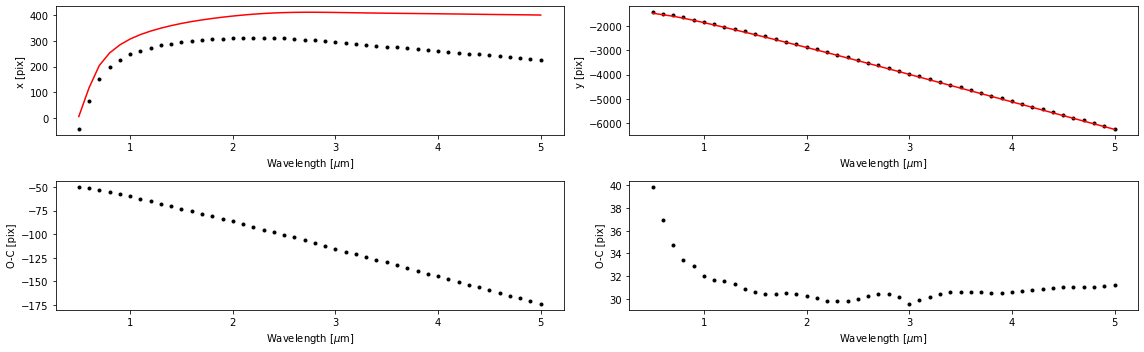

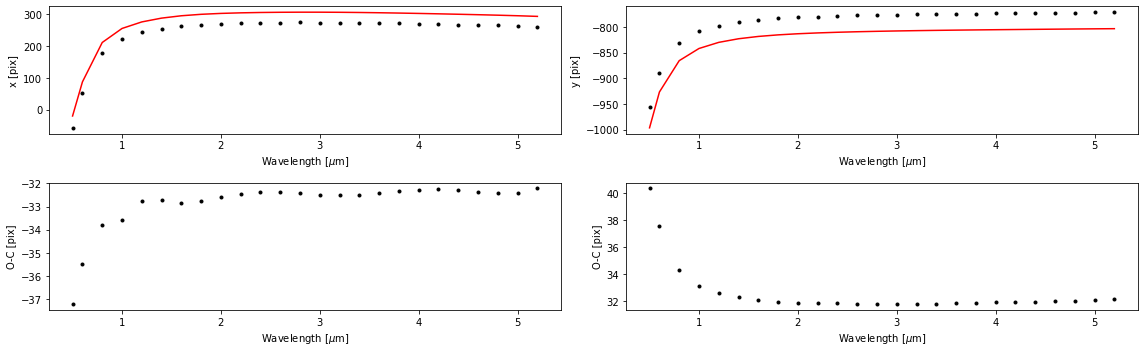

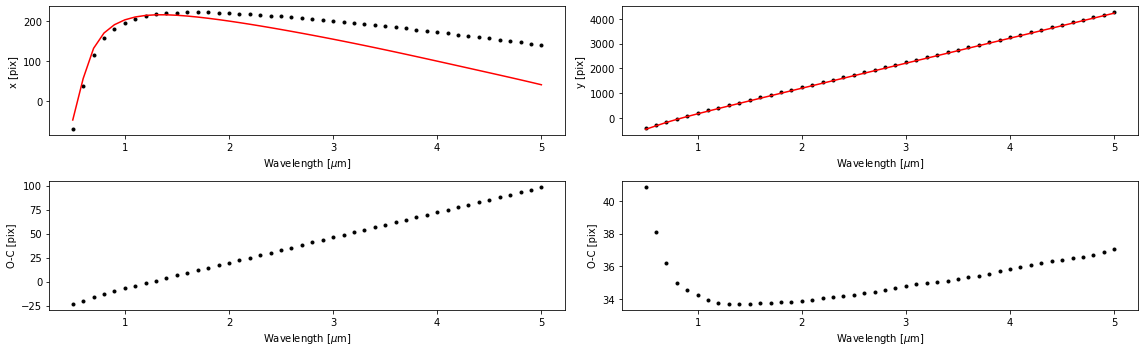

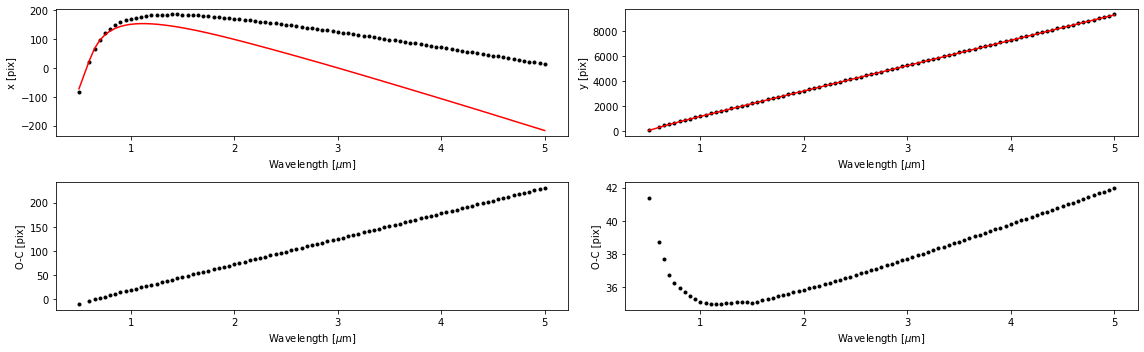

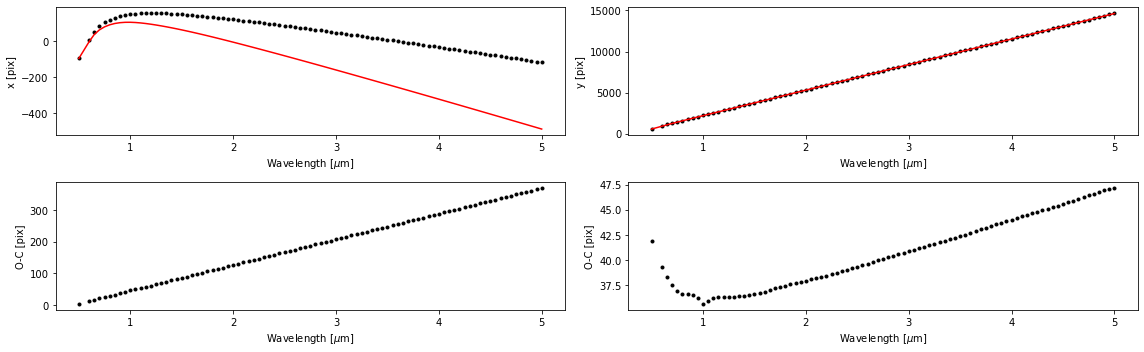

In [3]:
# Read the trace.
trace = ascii.read('NIRISS_GR700_trace_extended.csv')
trace['xpos'] /= 0.018
trace['ypos'] /= 0.018
trace['xpos'] -= 0.5
trace['ypos'] -= 0.5

# Plot the transformation to x, y for different m.
for m in [-1, 0, 1, 2, 3]:
    mask = trace['order'] == m
    wave = trace['Wavelength'][mask]
    spatpix_nat = trace['xpos'][mask]
    specpix_nat = trace['ypos'][mask]

    specpixp_nat, spatpixp_nat, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m, frame='nat')

    plt.figure(figsize=(16,5))

    ax1 = plt.subplot(221)
    plt.plot(wave, spatpix_nat, 'k.')
    plt.plot(wave, spatpixp_nat, 'r-')
    plt.xlabel(r'Wavelength [$\mu$m]')
    plt.ylabel('x [pix]')

    ax2 = plt.subplot(222)
    plt.plot(wave, specpix_nat, 'k.')
    plt.plot(wave, specpixp_nat, 'r-')
    plt.xlabel(r'Wavelength [$\mu$m]')
    plt.ylabel('y [pix]')

    plt.subplot(223, sharex=ax1)
    plt.plot(wave, spatpix_nat - spatpixp_nat, 'k.')
    plt.xlabel(r'Wavelength [$\mu$m]')
    plt.ylabel('O-C [pix]')

    plt.subplot(224, sharex=ax2)
    plt.plot(wave, specpix_nat - specpixp_nat, 'k.')
    plt.xlabel(r'Wavelength [$\mu$m]')
    plt.ylabel('O-C [pix]')

    plt.tight_layout()
    plt.show()


Double-check the order 0 specpix to wavelength.

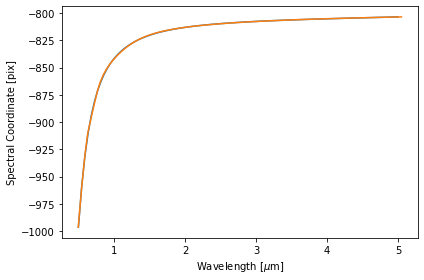

In [4]:
# Test order 0.
wave = np.linspace(0.5, 5, 101)

# Note mask will be False for invalid wavelenghts. 
specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, m=0, frame='nat') 
wave_p, mask_p = tracepol.specpix_to_wavelength(specpix, tracepars, m=0, frame='nat')

plt.plot(wave, specpix)
plt.plot(wave_p, specpix)

plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel('Spectral Coordinate [pix]')

plt.tight_layout()
plt.show()

Next we check the accuaracy of the inverse transformation.

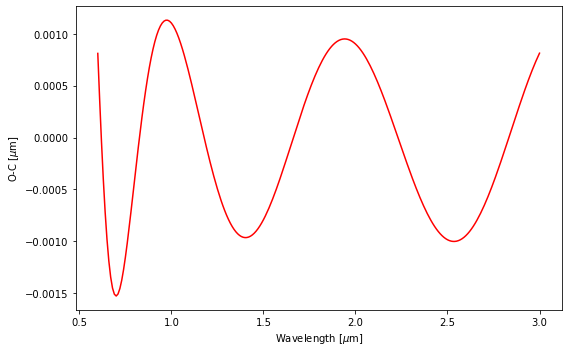

In [5]:
# Check the accuaracy of the inverse transfromation for m=1.
wave = np.linspace(0.6, 3.0, 241)
specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars)
wave_inv, mask = tracepol.specpix_to_wavelength(specpix, tracepars)

plt.figure(figsize=(8,5))

ax1 = plt.subplot(111)
plt.plot(wave, wave - wave_inv, 'r-')
plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel(r'O-C [$\mu$m]')

plt.tight_layout()
plt.show()

Next we test the transformations between frames.

In [6]:
specpix_nat = 2048*np.random.rand(1000)
spatpix_nat = 256*np.random.rand(1000)
for frame in ['nat', 'dms', 'sim']:
    specpix, spatpix = tracepol.pix_ref_to_frame(specpix_nat, spatpix_nat, frame=frame)
    specpix_inv, spatpix_inv = tracepol.pix_frame_to_ref(specpix, spatpix, frame=frame)
    print(np.allclose(specpix_nat, specpix_inv), np.allclose(spatpix_nat, spatpix_inv))
    

True True
True True
True True


In [7]:
specpix_nat = 2048*np.random.rand(1000)
spatpix_nat = 256*np.random.rand(1000)
for frame in ['nat', 'dms', 'sim']:
    specpix, spatpix = tracepol.pix_ref_to_frame(specpix_nat, spatpix_nat, frame=frame, subarray='SUBSTRIP96')
    specpix_inv, spatpix_inv = tracepol.pix_frame_to_ref(specpix, spatpix, frame=frame, subarray='SUBSTRIP96')
    print(np.allclose(specpix_nat, specpix_inv), np.allclose(spatpix_nat, spatpix_inv))

True True
True True
True True


Plot the trace profile in every coordinate frame.

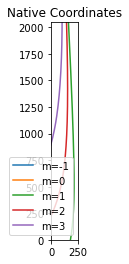

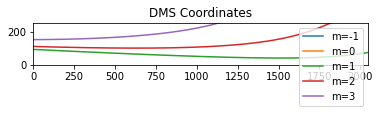

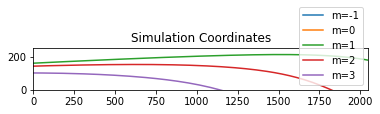

In [8]:
wave = np.linspace(0.5, 3, 251)
plt.subplot(111, aspect=1)
plt.title('Native Coordinates')
for m in [-1, 0, 1, 2, 3]:
    specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m, frame='nat')
    plt.plot(spatpix[mask], specpix[mask], label='m={}'.format(m))
plt.xlim(-0.5, 255.5)
plt.ylim(-0.5, 2047.5)
plt.legend()
plt.show()

wave = np.linspace(0.5, 3, 251)
plt.subplot(111, aspect=1)
plt.title('DMS Coordinates')
for m in [-1, 0, 1, 2, 3]:
    specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m, frame='dms')
    plt.plot(specpix[mask], spatpix[mask], label='m={}'.format(m))
plt.ylim(-0.5, 255.5)
plt.xlim(-0.5, 2047.5)
plt.legend()
plt.show()

wave = np.linspace(0.5, 3, 251)
plt.subplot(111, aspect=1)
plt.title('Simulation Coordinates')
for m in [-1, 0, 1, 2, 3]:
    specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m, frame='sim')
    plt.plot(specpix[mask], spatpix[mask], label='m={}'.format(m))
plt.ylim(-0.5, 255.5)
plt.xlim(-0.5, 2047.5)
plt.legend()
plt.show()

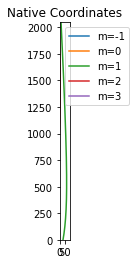

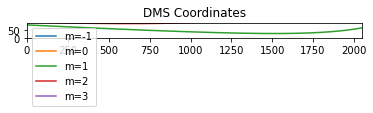

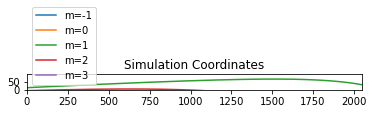

In [9]:
wave = np.linspace(0.5, 3, 251)
plt.subplot(111, aspect=1)
plt.title('Native Coordinates')
for m in [-1, 0, 1, 2, 3]:
    specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m, frame='nat', subarray='SUBSTRIP96')
    plt.plot(spatpix[mask], specpix[mask], label='m={}'.format(m))
plt.xlim(-0.5, 95.5)
plt.ylim(-0.5, 2047.5)
plt.legend()
plt.show()

wave = np.linspace(0.5, 3, 251)
plt.subplot(111, aspect=1)
plt.title('DMS Coordinates')
for m in [-1, 0, 1, 2, 3]:
    specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m, frame='dms', subarray='SUBSTRIP96')
    plt.plot(specpix[mask], spatpix[mask], label='m={}'.format(m))
plt.ylim(-0.5, 95.5)
plt.xlim(-0.5, 2047.5)
plt.legend()
plt.show()

wave = np.linspace(0.5, 3, 251)
plt.subplot(111, aspect=1)
plt.title('Simulation Coordinates')
for m in [-1, 0, 1, 2, 3]:
    specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m, frame='sim', subarray='SUBSTRIP96')
    plt.plot(specpix[mask], spatpix[mask], label='m={}'.format(m))
plt.ylim(-0.5, 95.5)
plt.xlim(-0.5, 2047.5)
plt.legend()
plt.show()

Finaly we test the 2d wavelength map.

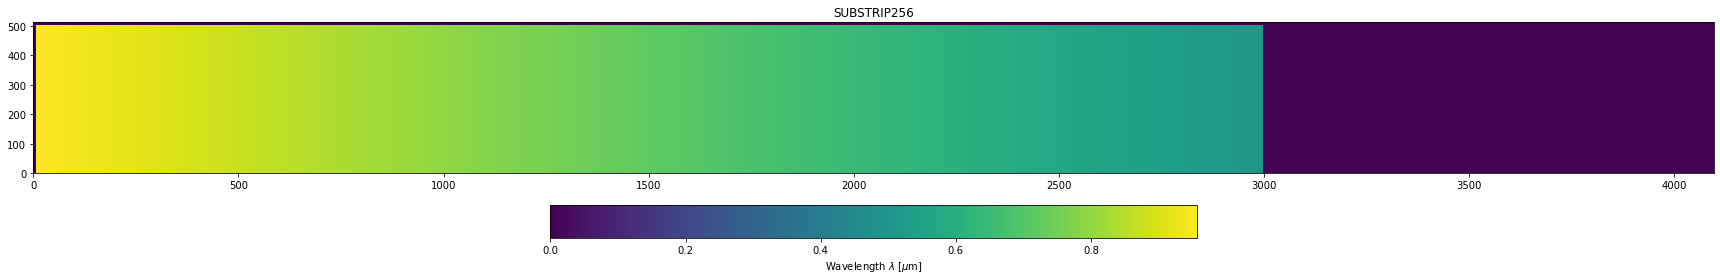

In [10]:
wavelength_map = tracepol.wavelength_map_2d(tracepars, m=3, oversample=2)

plt.figure(figsize=(24, 4))

plt.subplot(111)
plt.title('SUBSTRIP256')

plt.pcolormesh(wavelength_map)

cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Wavelength $\lambda$ [$\mu$m]')

plt.tight_layout()
plt.show()  

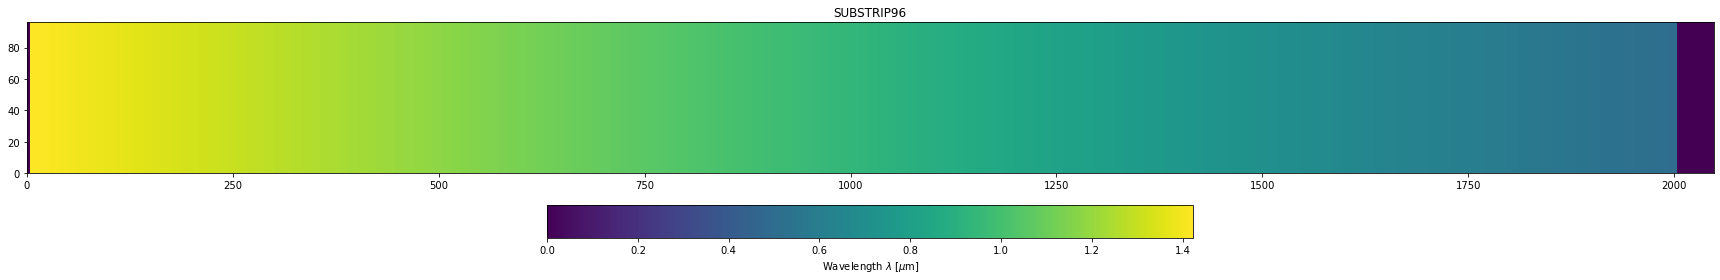

In [11]:
wavelength_map = tracepol.wavelength_map_2d(tracepars, m=2, subarray='SUBSTRIP96', oversample=1)

plt.figure(figsize=(24, 4))

plt.subplot(111)
plt.title('SUBSTRIP96')

plt.pcolormesh(wavelength_map)

cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Wavelength $\lambda$ [$\mu$m]')

plt.tight_layout()
plt.show()  